# Start Simulation

In [1]:
import random
import numpy as np
import os
import time
from PIL import Image

import torch
torch.__version__

'1.11.0+cu113'

In [2]:
import getpass
user = getpass.getuser()
print(user)

yizhou


In [3]:
usd_path = f"omniverse://localhost/Users/{user}/uva_sac.usd"

In [4]:
from omni.isaac.kit import SimulationApp    
simulation_app = SimulationApp({"headless": True, "open_usd": usd_path,  "livesync_usd": usd_path}) 

Starting kit application with the fillowing args:  ['/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.1/exts/omni.isaac.kit/omni/isaac/kit/simulation_app.py', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.1/apps/omni.isaac.sim.python.kit', '--/app/tokens/exe-path=/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.1/kit', '--/persistent/app/viewport/displayOptions=3094', '--/rtx/materialDb/syncLoads=True', '--/rtx/hydra/materialSyncLoads=True--/omni.kit.plugin/syncUsdLoads=True', '--/app/renderer/resolution/width=1280', '--/app/renderer/resolution/height=720', '--/app/window/width=1440', '--/app/window/height=900', '--/renderer/multiGpu/enabled=True', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.1/exts', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.1/apps', '--/physics/cudaDevice=0', '--portable', '--no-window']
Passing the following args to the base kit application:  ['-f', '/home/yizhou/.local/share/jupyter/runtime/kernel-4b6fdfbf-0c21-

OmniAssetFileFormat


Warp initialized:
   Version: 0.2.2
   CUDA device: NVIDIA GeForce RTX 3090
   Kernel cache: /home/yizhou/.cache/warp/0.2.2
[2.018s] [ext: omni.kit.menu.create-1.0.2] startup
[2.020s] [ext: omni.mdl-0.1.0] startup
[2.048s] [ext: omni.kit.window.file_importer-1.0.4] startup
[2.050s] [ext: omni.kit.window.file_exporter-1.0.4] startup
[2.051s] [ext: omni.kit.material.library-1.3.10] startup
[2.056s] [ext: omni.kit.window.drop_support-1.0.0] startup
[2.057s] [ext: omni.kit.window.file-1.3.16] startup
[2.060s] [ext: omni.kit.context_menu-1.3.9] startup
[2.065s] [ext: omni.kit.window.property-1.6.3] startup
[2.066s] [ext: omni.kit.window.content_browser-2.4.28] startup
[2.077s] [ext: omni.kit.widget.stage-2.6.15] startup
[2.081s] [ext: omni.isaac.version-1.0.0] startup
[2.082s] [ext: omni.kit.property.usd-3.14.9] startup
[2.117s] [ext: omni.kit.viewport.legacy_gizmos-1.0.0] startup
[2.121s] [ext: omni.hydra.rtx-0.1.0] startup
[2.132s] [ext: omni.renderer-rtx-0.0.0] startup
[2.132s] [ext: omn

In [5]:
pause

NameError: name 'pause' is not defined

# Init Env

In [6]:
from uva_env import UvaEnv
env = UvaEnv()

In [7]:
from task.utils import add_scene_default
add_scene_default()

In [8]:
print(list(env.stage.TraverseAll()))

[Usd.Prim(</physicsScene>), Usd.Prim(</World>), Usd.Prim(</World/defaultLight>), Usd.Prim(</World/base>), Usd.Prim(</World/base/Apperson_CoffeeTable_Top>), Usd.Prim(</World/base/Apperson_CoffeeTable_Leg>), Usd.Prim(</World/base/Looks>), Usd.Prim(</World/base/Looks/Legs>), Usd.Prim(</World/base/Looks/Legs/Shader>), Usd.Prim(</World/base/Looks/Tabletop>), Usd.Prim(</World/base/Looks/Tabletop/Shader>), Usd.Prim(</World/render>), Usd.Prim(</World/render/camera_main>), Usd.Prim(</World/render/camera_main/OmniverseKitViewportCameraMesh>), Usd.Prim(</World/render/camera_main/OmniverseKitViewportCameraMesh/CameraModel>), Usd.Prim(</OmniverseKit_Persp>), Usd.Prim(</OmniverseKit_Front>), Usd.Prim(</OmniverseKit_Top>), Usd.Prim(</OmniverseKit_Right>), Usd.Prim(</Render>), Usd.Prim(</Render/RenderProduct_Viewport>), Usd.Prim(</Render/Vars>), Usd.Prim(</Render/Vars/LdrColor>)]


In [9]:
env.clean()
env.world.step(render=True)

# Config

In [10]:
from task.config import DATA_PATH
task_type = "Table"
side_choice = "Border"
base_asset_id = 0
load_nucleus = True

# Scene

In [11]:
from task.scene import ArrangeScene
scene = ArrangeScene(task_type, side_choice, base_asset_id = 0, traj_id = 0, load_nucleus = load_nucleus)
env.scene = scene

In [12]:
# add base
scene.add_base_asset()

asset_prim: omniverse://localhost/Users/yizhou/Asset/T/Appleseed/Appleseed_CoffeeTable.usd


In [13]:
# add room
# scene.add_room()

In [14]:
env.world.step(render=True)

# Reward

In [15]:
from uv.reward import Rewarder

In [16]:
rewarder = Rewarder(env.world)
env.rewarder = rewarder

# Render

In [17]:
from render.helper import RenderHelper
render = RenderHelper(task_type, side_choice)

render.add_task_cameras()
render.set_cameras()

xform_mat:  ( (-1, 0, 0, 0), (0, -1, 0, 0), (0, 0, 1, 0), (0, 56, 200, 1) )


In [18]:
pause

NameError: name 'pause' is not defined

#  Learning

In [19]:
from learning.network.resnet import ResNetFeatureExtractor
from learning.utils import extract_image_feature_and_save

device = torch.device("cuda")
feature_extractor = ResNetFeatureExtractor(output_layer='layer4').to(device)

# Trajectory

In [20]:
# traj config
for traj_id in range(5):

    base_asset_id = 0
    env.scene.base_asset_id = base_asset_id
    env.scene.traj_id = traj_id
    image_folder = os.path.join(DATA_PATH, task_type, side_choice, str(traj_id))

    # base
    # scene.add_base_asset()
    env.world.step(render = True)

    # get images
    env.world.render()
    images = render.get_images()
    render.save_rgb(images[0]['rgb'], image_folder, "0")
    
    ## extract feature
    
    extract_image_feature_and_save(images[0]['rgb'][:,:,:3], 
        feature_extractor, os.path.join(image_folder, str(0) + ".pt"))
    

    # trajectory
    for step in range(5):

        env.add_scene_obj(mode = "random")

        x, y = np.tanh(np.random.randn()), np.tanh(np.random.randn())

        env.put_last_object((x, y)) 
        env.world.step(render=True)

        env.register_last_object()
        env.world.step(render=True)

        # get images
        env.world.render()
        images = render.get_images()
        render.save_rgb(images[0]['rgb'], image_folder, str(step + 1))

        ## calculate reward
        env.calculate_last_reward(simulation_step = 30)
        
        ## extract feature
        extract_image_feature_and_save(images[0]['rgb'][:,:,:3], 
            feature_extractor, os.path.join(image_folder, str(step + 1) + ".pt"))

        ## reset
        env.world.reset()
        env.world.step(render=True)


    # Record
    record = env.scene.get_scene_data()
    env.scene.save_scene_data()
    print("record: ", record)

    # Reset (env clean)
    env.clean(clean_all = False)
    env.step(render = True)

loading asset from omni nucleus
object_folder ['Apple.usd', 'Avocado01.usd', 'Kiwi01.usd', 'Lime01.usd', 'Lychee01.usd', 'Pomegranate01.usd']
asset_prim: omniverse://localhost/Users/yizhou/Asset/I/Fruit/Kiwi01.usd
/World/objects/Fruit begin_translation (-84.55144500732422, 60.71913528442383, 44.991825103759766) timecode 0.0 end_translation (-84.55144500732422, 60.71913528442383, 43.56119918823242)
loading asset from omni nucleus
object_folder ['P_Glassware_Short.usd', 'P_Glassware_Tall.usd', 'bowl_plate.usd', 'plate_large.usd', 'plate_small.usd']
asset_prim: omniverse://localhost/Users/yizhou/Asset/I/Dinnerware/P_Glassware_Tall.usd
/World/objects/Dinnerware begin_translation (54.35562515258789, -85.94207763671875, 44.991825103759766) timecode 0.0 end_translation (54.35562515258789, -85.94207763671875, 43.56119918823242)
loading asset from omni nucleus
object_folder ['Magazine01.usd', 'MagazineStack01.usd', 'MagazineStack02.usd', 'OpenMagazine.usd']
asset_prim: omniverse://localhost/Use

/World/objects/Tchotchke begin_translation (47.51185989379883, 89.3738021850586, 44.991817474365234) timecode 0.0 end_translation (47.51185989379883, 89.3738021850586, 43.561153411865234)
 for /World/objects/Magazine

2022-12-22 00:25:50 [995,306ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Magazine

2022-12-22 00:25:50 [995,481ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:rotateXYZ for /World/objects/Tchotchke

2022-12-22 00:25:50 [995,678ms] [Warning] [omni.isaac.synthetic_utils.syntheticdata] Set verify_sensor_init to false if running with asyncio
2022-12-22 00:25:51 [995,977ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Magazine

2022-12-22 00:25:51 [995,977ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Magazine

2022-12-22 00:25:51 [995,977ms] [Warning] [omni.hydra.scene_delegate.

loading asset from omni nucleus
object_folder ['Apple.usd', 'Avocado01.usd', 'Kiwi01.usd', 'Lime01.usd', 'Lychee01.usd', 'Pomegranate01.usd']
asset_prim: omniverse://localhost/Users/yizhou/Asset/I/Fruit/Avocado01.usd
/World/objects/Fruit begin_translation (-78.83189392089844, -66.34149169921875, 44.9918212890625) timecode 0.0 end_translation (-78.83189392089844, -66.34149169921875, 43.561195373535156)
loading asset from omni nucleus
object_folder ['Apple.usd', 'Avocado01.usd', 'Kiwi01.usd', 'Lime01.usd', 'Lychee01.usd', 'Pomegranate01.usd']
asset_prim: omniverse://localhost/Users/yizhou/Asset/I/Fruit/Lychee01.usd
/World/objects/Fruit_01 begin_translation (93.5535888671875, -71.66265869140625, 44.991825103759766) timecode 0.0 end_translation (93.5535888671875, -71.66265869140625, 43.56119918823242)
loading asset from omni nucleus
object_folder ['brass_grinder.usd', 'coffee_grinder.usd', 'red_grinder.usd']
asset_prim: omniverse://localhost/Users/yizhou/Asset/I/GadgetsAndTool/red_grinder.

2022-12-22 00:26:01 [1,006,632ms] [Warning] [omni.isaac.synthetic_utils.syntheticdata] Set verify_se/World/objects/Dinnerware_01 begin_translation (22.917146682739258, 38.3355598449707, 44.9918212890625) timecode 0.0 end_translation (22.917146682739258, 38.33556365966797, 44.980072021484375)
loading asset from omni nucleus
object_folder ['P_Glassware_Short.usd', 'P_Glassware_Tall.usd', 'bowl_plate.usd', 'plate_large.usd', 'plate_small.usd']
asset_prim: omniverse://localhost/Users/yizhou/Asset/I/Dinnerware/P_Glassware_Short.usd
/World/objects/Dinnerware_02 begin_translation (-16.364364624023438, 89.251220703125, 44.9918212890625) timecode 0.0 end_translation (-16.364364624023438, 89.251220703125, 43.56113052368164)
nsor_init to false if running with asyncio
2022-12-22 00:26:02 [1,006,906ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Dinnerware_01

2022-12-22 00:26:02 [1,006,906ms] [Warning] [omni.hydra.scene_delegate.plugin] canno

/World/objects/Flatware_01 begin_translation (24.511281967163086, 75.0626449584961, 45.00844192504883) timecode 0.0 end_translation (24.511295318603516, 75.06143951416016, 44.951595306396484)
 [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Dinnerware_01

2022-12-22 00:26:02 [1,007,487ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Dinnerware_01

2022-12-22 00:26:02 [1,007,487ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Dinnerware_01

2022-12-22 00:26:02 [1,007,487ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Dinnerware_01

2022-12-22 00:26:02 [1,007,487ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Dinnerware_01

2022-12-22 00:26:02 [1,007,487ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform

2022-12-22 00:26:06 [1,011,120ms] [Warning] [omni.isaac.synthetic_utils.syntheticdata] Set verify_sensor_init to false if /World/objects/Fruit begin_translation (-70.2872314453125, 90.01771545410156, 44.9918212890625) timecode 0.0 end_translation (-70.2872314453125, 90.01771545410156, 43.5611572265625)
running with asyncio
2022-12-22 00:26:06 [1,011,389ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Flatware_01

2022-12-22 00:26:06 [1,011,389ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Flatware_01

2022-12-22 00:26:06 [1,011,390ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Flatware_01

2022-12-22 00:26:06 [1,011,390ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Flatware_01

2022-12-22 00:26:06 [1,011,390ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot f

loading asset from omni nucleus
object_folder ['Apple.usd', 'Avocado01.usd', 'Kiwi01.usd', 'Lime01.usd', 'Lychee01.usd', 'Pomegranate01.usd']
asset_prim: omniverse://localhost/Users/yizhou/Asset/I/Fruit/Pomegranate01.usd
/World/objects/Fruit begin_translation (-44.35134506225586, -93.16887664794922, 44.991825103759766) timecode 0.0 end_translation (-44.35134506225586, -93.16887664794922, 43.56119918823242)
loading asset from omni nucleus
object_folder ['DecorativeWoodenBowl.usd', 'Lemon_01.usd', 'Lemon_02.usd', 'Orange_01.usd', 'Orange_02.usd', 'Orange_03.usd', 'PumpkinLarge.usd', 'PumpkinSmall.usd', 'ServingTray.usd', 'WoodenTray_Large.usd', 'WoodenTray_Medium.usd']
asset_prim: omniverse://localhost/Users/yizhou/Asset/I/Tchotchke/PumpkinSmall.usd
/World/objects/Tchotchke begin_translation (-17.848567962646484, 98.26347351074219, 44.991825103759766) timecode 0.0 end_translation (-17.848567962646484, 98.26347351074219, 43.56119918823242)
loading asset from omni nucleus
object_folder ['M

/World/objects/Dinnerware begin_translation (-88.81741333007812, 44.197364807128906, 44.9918212890625) timecode 0.0 end_translation (-88.81741333007812, 44.197364807128906, 43.5611572265625)
] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Magazine

2022-12-22 00:26:11 [1,016,174ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Magazine

2022-12-22 00:26:11 [1,016,174ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Magazine

2022-12-22 00:26:11 [1,016,174ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Magazine

2022-12-22 00:26:11 [1,016,174ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objects/Magazine

2022-12-22 00:26:11 [1,016,174ms] [Warning] [omni.hydra.scene_delegate.plugin] cannot find xform op xformOp:orient for /World/objec

# Debug

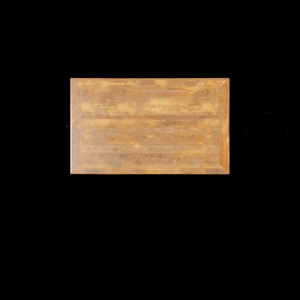

In [21]:
# get images
env.world.render()
env.world.render()
images = render.get_images()

Image.fromarray(images[0]['rgb'], "RGBA").resize((300, 300))

# Replay Buffer

In [22]:
import json
from learning.replay_buffer import ReplayBuffer

buffer = ReplayBuffer(max_size=1000)

for i in range(5):
    replay = json.load(open(f"/home/yizhou/Research/DeepArrange/Data/Table/Border/{i}/scene.json"))
    buffer.add_scene_sample(replay)

In [ ]:
len(buffer.dataset)

In [ ]:
from learning.network.sac import *

In [ ]:
policy = Policy()

In [ ]:
qf1 = QFunction()
qf2 = QFunction()
target_qf1 = QFunction()
target_qf2 = QFunction()

In [ ]:
from learning.sac_trainer import SACTrainer

In [ ]:
trainer = SACTrainer(policy, qf1, qf2, target_qf1, target_qf2, 
                     use_automatic_entropy_tuning = False, policy_lr=1e-2, qf_lr=1e-2)

In [ ]:
self = trainer

In [ ]:
for _ in range(200):
    batch = buffer.sample_batch()

    rewards = batch['rewards']
    terminals = batch['terminals']
    obs = batch['observations']
    actions = batch['actions']
    next_obs = batch['next_observations']

    obj_features = batch['object_features']

    # print("rewards", rewards)

    # self.update(batch)
    
    # debug
    loss = self.qf_criterion(self.qf1(obs, obj_features, actions), rewards)
    
    self.qf1_optimizer.zero_grad()
    loss.backward()
    self.qf1_optimizer.step()
    
    if _ % 20 == 0:
        print(loss)

In [ ]:
rewards, actions

In [ ]:
# dist = self.policy(obs, obj_features)

In [ ]:
self.qf1(obs, obj_features, actions)

In [ ]:
obj_features

In [ ]:
obs[0] = 1

In [ ]:
obs

In [ ]:
# dist.rsample_and_logprob()

In [ ]:
# dist.sample()

In [ ]:
dist.mean, dist.stddev

In [ ]:
dist.sample()

In [ ]:
obs